In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("TikTok_songs_2022.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        263 non-null    object 
 1   artist_name       263 non-null    object 
 2   artist_pop        263 non-null    int64  
 3   album             263 non-null    object 
 4   track_pop         263 non-null    int64  
 5   danceability      263 non-null    float64
 6   energy            263 non-null    float64
 7   loudness          263 non-null    float64
 8   mode              263 non-null    int64  
 9   key               263 non-null    int64  
 10  speechiness       263 non-null    float64
 11  acousticness      263 non-null    float64
 12  instrumentalness  263 non-null    float64
 13  liveness          263 non-null    float64
 14  valence           263 non-null    float64
 15  tempo             263 non-null    float64
 16  time_signature    263 non-null    int64  
 1

In [7]:
df.isnull().sum()

track_name          0
artist_name         0
artist_pop          0
album               0
track_pop           0
danceability        0
energy              0
loudness            0
mode                0
key                 0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
duration_ms         0
dtype: int64

In [8]:
df.head()

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4,298933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.3420,0.001010,0.3110,0.662,173.930,4,167303
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.3500,0.000000,0.1500,0.841,131.430,4,163026
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,0.0944,0.4400,0.000007,0.0921,0.531,80.870,4,238805
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,0,10,0.0656,0.0995,0.000000,0.3350,0.722,108.966,4,191822


In [9]:
df.columns = ["trck_name","art_name","art_pop","album",
              "trck_pop","dance","energy","loud","mode",
              "key","speech","acoustic","instrument",
              "live","valance","tempo","t_signature","dur_sec"]

In [10]:
df['dur_sec'] = df['dur_sec'].apply(lambda x: x / 1000)
df['dur_sec']

0      298.933
1      167.303
2      163.026
3      238.805
4      191.822
        ...   
258    216.320
259    233.720
260    218.365
261    214.800
262    133.134
Name: dur_sec, Length: 263, dtype: float64

In [11]:
missing_data = df[df.isna().any(axis=1)]
missing_data

,trck_name,art_name,art_pop,album,trck_pop,dance,energy,loud,mode,key,speech,acoustic,instrument,live,valance,tempo,t_signature,dur_sec


In [12]:
df.head(3)

,trck_name,art_name,art_pop,album,trck_pop,dance,energy,loud,mode,key,speech,acoustic,instrument,live,valance,tempo,t_signature,dur_sec
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.720,0.00314,0.0604,0.197,108.375,4,298.933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.342,0.00101,0.3110,0.662,173.930,4,167.303
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.350,0.00000,0.1500,0.841,131.430,4,163.026


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<Axes: xlabel='trck_pop', ylabel='art_pop'>

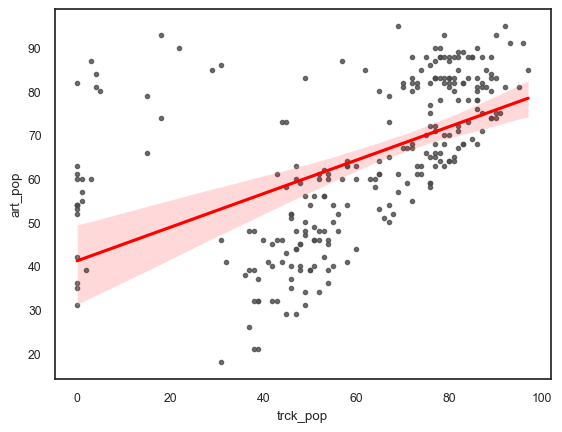

In [97]:
sns.regplot(x=df["trck_pop"], y=df["art_pop"],
            ci=99, marker=".", color=".3", line_kws=dict(color="red"))

In [15]:
object_data = df.dtypes[df.dtypes == 'object']
object_data

trck_name    object
art_name     object
album        object
dtype: object

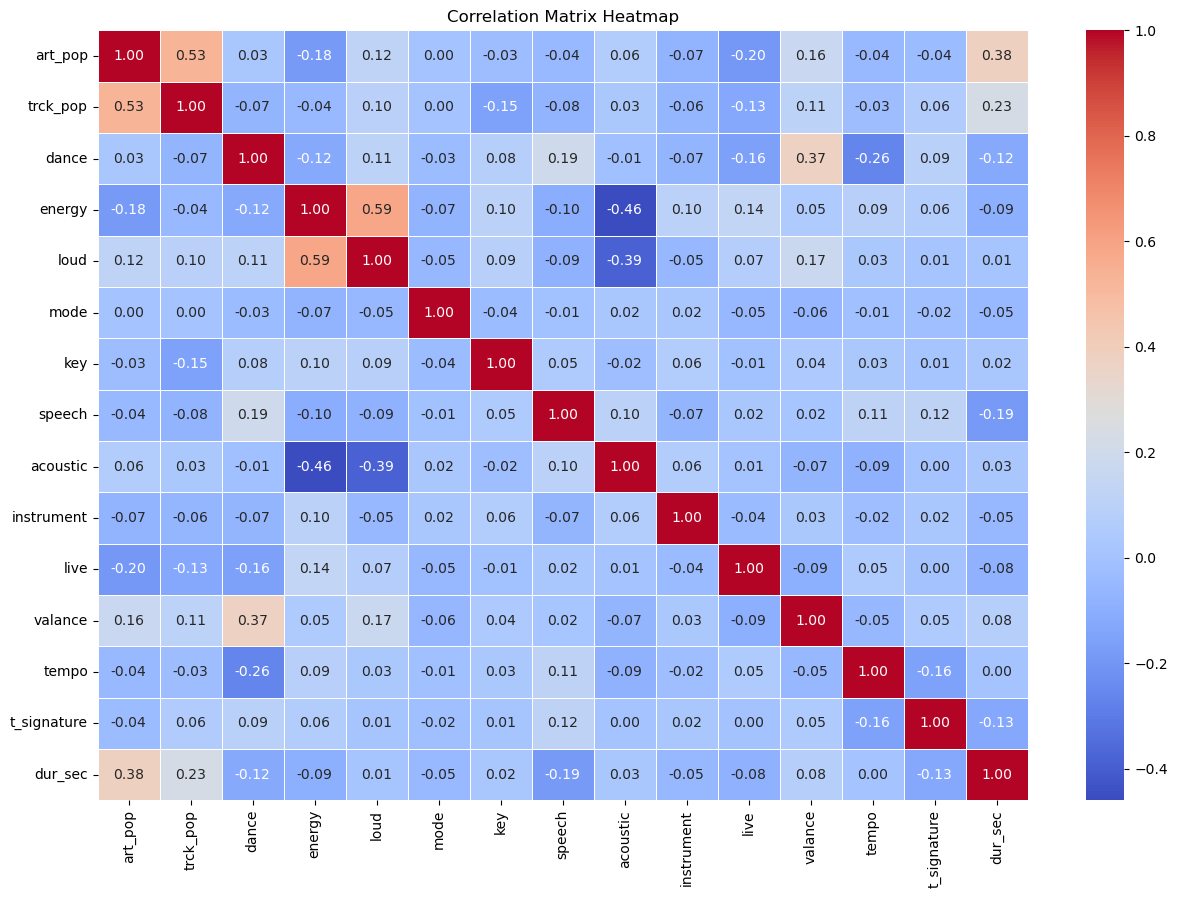

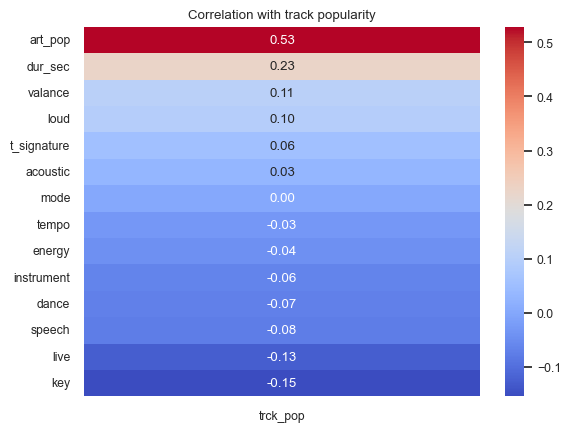

In [16]:
correlation_matrix = df[["art_pop","trck_pop","dance","energy","loud","mode","key","speech","acoustic","instrument","live","valance","tempo","t_signature","dur_sec"]].corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


#Graph II
# Create a heatmap of the correlations with the target column
corr = df[["art_pop","trck_pop","dance","energy","loud","mode","key","speech","acoustic","instrument","live","valance","tempo","t_signature","dur_sec"]].corr()
target_corr = corr['trck_pop'].drop('trck_pop')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with track popularity')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

In [18]:
#@title fitur utk regresi: art_pop
x = df[['art_pop']]
x.shape
y = df[['trck_pop']]
y.shape
model_regresi = LinearRegression()

In [19]:
#Evaluasi dengan train test split

#Split dataset utk training dan test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)
model_regresi.fit(x_train, y_train) #training the algorithm

LinearRegression()

In [20]:
#To retrieve the intercept:
print("Hasil intercept ", model_regresi.intercept_)
#For retrieving the slope:
print("Koefisien slope ", model_regresi.coef_)

Hasil intercept  [13.34002625]
Koefisien slope  [[0.72404607]]


In [21]:
y_predictor = model_regresi.predict(x_test)
y_predictor

array([[67.64348175],
       [60.40302101],
       [45.19805347],
       [56.78279065],
       [52.43851421],
       [52.43851421],
       [82.12440321],
       [50.99042206],
       [77.0560807 ],
       [43.02591525],
       [42.30186918],
       [58.95492887],
       [61.12706709],
       [77.0560807 ],
       [60.40302101],
       [39.40568489],
       [73.43585033],
       [67.64348175],
       [42.30186918],
       [41.57782311],
       [66.1953896 ],
       [34.33736237],
       [71.26371211],
       [82.12440321],
       [67.64348175],
       [75.60798855],
       [77.0560807 ],
       [73.43585033],
       [28.54499379],
       [59.67897494],
       [72.71180426],
       [69.81561997],
       [71.98775819],
       [80.67631107],
       [43.02591525],
       [36.50950059],
       [74.88394248],
       [53.16256028],
       [32.16522415],
       [72.71180426],
       [50.26637599],
       [74.15989641],
       [71.26371211],
       [45.92209955],
       [41.57782311],
       [40

In [22]:
df_compare = pd.DataFrame(y_test)

In [23]:
y_test

,trck_pop
259,90
38,81
139,60
186,60
102,0
243,0
260,92
250,56
134,85
25,58


In [24]:
print('Hasil MAE:', metrics.mean_absolute_error(y_test, y_predictor))
print('Hasil MSE:', metrics.mean_squared_error(y_test, y_predictor))
print('Hasil RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predictor)))

Hasil MAE: 16.402995069936768
Hasil MSE: 536.3636000641098
Hasil RMSE: 23.159525039691765


In [25]:
from sklearn.metrics import  r2_score

In [26]:
r_2s = r2_score (y_test, y_predictor)
print ("R^2: ", r_2s)

R^2:  0.3101642842974911


In [27]:
#Evaluasi dengan K-FOLDS CROSS VALIDATION
#Pilihan scoring, lihat di:
# https://scikit-learn.org/stable/modules/model_evaluation.html
#contoh: neg_mean_absolute_error, neg_mean_squared_error, neg_root_mean_squared_error, r2

lm_1 = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 47)
scores = cross_val_score(lm_1, x, y, scoring='r2', cv=folds)
print(scores)
print("Avg R2: " + str(np.mean(scores)))
scores = cross_val_score(lm_1, x, y, scoring='neg_mean_absolute_error', cv=folds)
print(scores)
print("Avg MAE: " + str(np.mean(scores)))
scores = cross_val_score(lm_1, x, y, scoring='neg_mean_squared_error', cv=folds)
print(scores)
print("Avg MSE: " + str(np.mean(scores)))

[0.36312906 0.19595381 0.36391176 0.20955107 0.13949195]
Avg R2: 0.2544075307004065
[-17.64344217 -14.59858483 -12.20141858 -14.81811521 -13.54647307]
Avg MAE: -14.561606771310181
[-515.66095274 -553.39902761 -310.66966319 -422.11229929 -482.71573984]
Avg MSE: -456.91153653604863


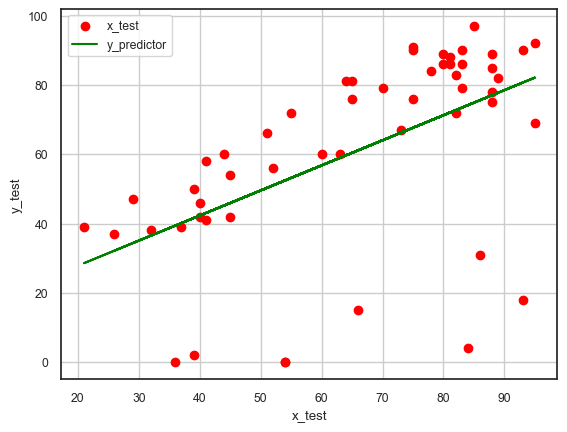

In [28]:
import matplotlib.pyplot as plt
plt.scatter(x_test, y_test,  color='red')
plt.plot(x_test, y_predictor, color='green', linewidth=1.5)

plt.legend(["x_test" , "y_predictor"])

plt.xlabel("x_test")
plt.ylabel("y_test") 
plt.grid(True)
plt.show()

In [29]:
model_regresi.fit(x, y)

LinearRegression()

In [30]:
#@title fitur utk regresi: key
x1 = df[['key']]
x1.shape
y1 = df[['trck_pop']]
y1.shape
model_regresi1 = LinearRegression()

In [31]:
#Evaluasi dengan train test split

#Split dataset utk training dan test
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=3)
model_regresi1.fit(x_train1, y_train1) #training the algorithm

LinearRegression()

In [32]:
#To retrieve the intercept:
print(model_regresi1.intercept_)
#For retrieving the slope:
print(model_regresi1.coef_)

[65.9770946]
[[-1.07595957]]


In [33]:
#hasil prediksi dari data test
y_predictor1 = model_regresi1.predict(x_test1)

In [34]:
#Buat dataframe utk membandingkan
df_comp1 = pd.DataFrame(y_test1)

In [35]:
y_predictor1

array([[64.90113503],
       [63.82517546],
       [59.52133718],
       [60.59729675],
       [56.29345848],
       [64.90113503],
       [65.9770946 ],
       [57.36941805],
       [59.52133718],
       [54.14153934],
       [57.36941805],
       [60.59729675],
       [55.21749891],
       [60.59729675],
       [62.74921589],
       [55.21749891],
       [64.90113503],
       [58.44537762],
       [59.52133718],
       [60.59729675],
       [55.21749891],
       [61.67325632],
       [54.14153934],
       [64.90113503],
       [61.67325632],
       [60.59729675],
       [54.14153934],
       [59.52133718],
       [61.67325632],
       [64.90113503],
       [57.36941805],
       [61.67325632],
       [62.74921589],
       [64.90113503],
       [54.14153934],
       [60.59729675],
       [57.36941805],
       [58.44537762],
       [65.9770946 ],
       [56.29345848],
       [55.21749891],
       [54.14153934],
       [61.67325632],
       [58.44537762],
       [65.9770946 ],
       [63

In [36]:
y_test1

,trck_pop
259,90
38,81
139,60
186,60
102,0
243,0
260,92
250,56
134,85
25,58


In [37]:
# Hitung dan tampilkan MAE, MSE dan RMSE
print('Hasil MAE:', metrics.mean_absolute_error(y_test1, y_predictor1))
print('Hasil MSE:', metrics.mean_squared_error(y_test1, y_predictor1))
print('Hasil RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, y_predictor1)))

Hasil MAE: 23.158423594694753
Hasil MSE: 766.988342599336
Hasil RMSE: 27.694554385281883


In [38]:
# Hitung dan tampilkan R2
from sklearn.metrics import r2_score
r2_score1 = r2_score(y_test1, y_predictor1)
print('R^2: ', r2_score1)

R^2:  0.013549852769179638


In [39]:
#Evaluasi dengan K-FOLDS CROSS VALIDATION
#Pilihan scoring, lihat di:
# https://scikit-learn.org/stable/modules/model_evaluation.html
#contoh: neg_mean_absolute_error, neg_mean_squared_error, neg_root_mean_squared_error, r2
lm_2 = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 47)
scores = cross_val_score(lm_2, x1, y1, scoring='r2', cv=folds)
print(scores)
print("Avg R2: " + str(np.mean(scores)))
scores = cross_val_score(lm_2, x1, y1, scoring='neg_mean_absolute_error', cv=folds)
print(scores)
print("Avg MAE: " + str(np.mean(scores)))
scores = cross_val_score(lm_2, x1, y1, scoring='neg_mean_squared_error', cv=folds)
print(scores)
print("Avg MSE: " + str(np.mean(scores)))

[ 0.02054096 -0.03365354 -0.01708402 -0.02006099  0.0651984 ]
Avg R2: 0.002988162313911369
[-23.59869681 -21.53705677 -17.50519747 -19.19756878 -18.13490427]
Avg MAE: -19.99468482112885
[-793.04731118 -711.4303525  -496.7504964  -544.72879078 -524.39189228]
Avg MSE: -614.0697686264224


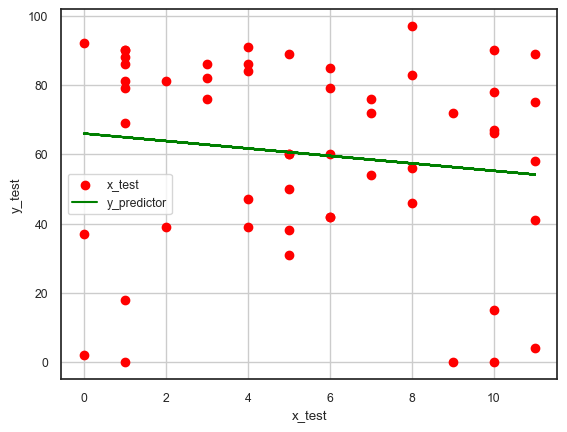

In [40]:
import matplotlib.pyplot as plt
plt.scatter(x_test1, y_test1,  color='red')
plt.plot(x_test1, y_predictor1, color='green', linewidth=1.5)

plt.legend(["x_test" , "y_predictor"])

plt.xlabel("x_test")
plt.ylabel("y_test") 
plt.grid(True)
plt.show()

In [41]:
model_regresi1.fit(x1, y1)

LinearRegression()

In [42]:
x2 = df[['live']]
x2.shape
y2 = df[['trck_pop']]
y2.shape
model_regresi2 = LinearRegression()

In [43]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=3)
model_regresi2.fit(x_train2, y_train2)

LinearRegression()

In [44]:
print(model_regresi2.intercept_)
print(model_regresi2.coef_)

[63.70152166]
[[-19.57449471]]


In [45]:
y_predictor2 = model_regresi2.predict(x_test2)

In [46]:
df_compare2 = pd.DataFrame(y_test2)

In [47]:
y_predictor2

array([[62.01028531],
       [62.03573216],
       [61.29385881],
       [59.00364293],
       [61.29385881],
       [61.56790173],
       [61.88109365],
       [56.870023  ],
       [62.38220071],
       [58.10321617],
       [54.30576419],
       [55.10831848],
       [61.96526398],
       [61.41130577],
       [56.90917199],
       [57.69215178],
       [55.83257478],
       [52.52448518],
       [57.65300279],
       [57.45725784],
       [62.22560475],
       [62.16883872],
       [61.89871069],
       [61.48960375],
       [61.43088027],
       [61.886966  ],
       [62.62492445],
       [61.97700867],
       [61.62662522],
       [61.27428431],
       [57.18321492],
       [60.43258104],
       [62.72083947],
       [61.94568948],
       [60.70662397],
       [61.03939038],
       [60.9415179 ],
       [60.86321992],
       [61.74407219],
       [60.31513407],
       [61.07853936],
       [58.37725909],
       [61.91241284],
       [61.56790173],
       [61.17641184],
       [52

In [48]:
y_test2

,trck_pop
259,90
38,81
139,60
186,60
102,0
243,0
260,92
250,56
134,85
25,58


In [49]:
print('Hasil MAE:', metrics.mean_absolute_error(y_test2, y_predictor2))
print('Hasil MSE:', metrics.mean_squared_error(y_test2, y_predictor2))
print('HASIL RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, y_predictor2)))

Hasil MAE: 22.966365721685158
Hasil MSE: 765.4816154445363
HASIL RMSE: 27.667338423573312


In [50]:
from sklearn.metrics import r2_score
r2_score2 = r2_score(y_test2, y_predictor2)
print('R^2: ',r2_score2)

R^2:  0.015487706503242493


In [51]:
lm_3 = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 47)
scores = cross_val_score(lm_3, x2, y2, scoring='r2', cv=folds)
print(scores)
print("Avg R2: " + str(np.mean(scores)))
scores = cross_val_score(lm_3, x2, y2, scoring='neg_mean_absolute_error', cv=folds)
print(scores)
print("Avg MAE: " + str(np.mean(scores)))
scores = cross_val_score(lm_3, x2, y2, scoring='neg_mean_squared_error', cv=folds)
print(scores)
print("Avg MSE: " + str(np.mean(scores)))

[ 0.00747007  0.0349315  -0.02979956 -0.05902981  0.02561657]
Avg R2: -0.004162246874330822
[-23.54580047 -21.18718738 -17.17480849 -19.33477522 -18.41830995]
Avg MAE: -19.93217630272486
[-803.63053175 -664.22548572 -502.96085158 -565.53876152 -546.59595259]
Avg MSE: -616.5903166337732


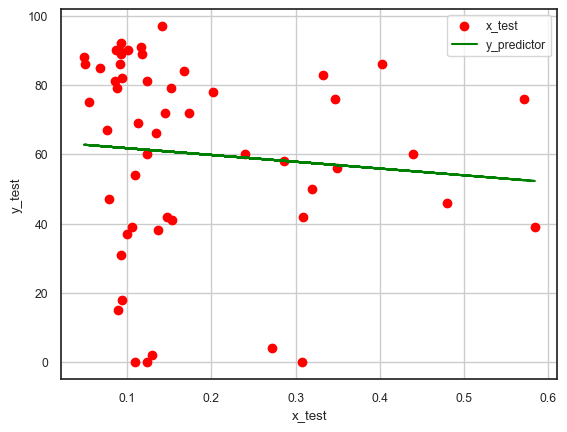

In [52]:
import matplotlib.pyplot as plt
plt.scatter(x_test2, y_test2,  color='red')
plt.plot(x_test2, y_predictor2, color='green', linewidth=1.5)

plt.legend(["x_test" , "y_predictor"])

plt.xlabel("x_test")
plt.ylabel("y_test") 
plt.grid(True)
plt.show()

In [53]:
model_regresi2.fit(x2, y2)

LinearRegression()

In [54]:
x3 = df[['dur_sec']]
x3.shape
y3 = df[['trck_pop']]
y3.shape
model_regresi3 = LinearRegression()

In [55]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.2, random_state=3)
model_regresi3.fit(x_train3, y_train3) #training the algorithm

LinearRegression()

In [56]:
#To retrieve the intercept:
print(model_regresi3.intercept_)
#For retrieving the slope:
print(model_regresi3.coef_)

[36.37306421]
[[0.13285709]]


In [57]:
y_predictor3 = model_regresi3.predict(x_test3)

In [58]:
df_compare3 = pd.DataFrame(y_test3)

In [59]:
y_predictor3

array([[67.42442388],
       [57.98625602],
       [57.39730053],
       [53.39139348],
       [61.44784757],
       [50.46003459],
       [65.38440322],
       [53.60369911],
       [63.35155685],
       [58.49430154],
       [58.14621596],
       [62.69138995],
       [57.54809333],
       [59.30778552],
       [52.68432803],
       [54.3087717 ],
       [67.2048111 ],
       [62.44135291],
       [60.01578097],
       [53.6015734 ],
       [54.89507005],
       [55.32433132],
       [68.10000219],
       [69.19660463],
       [60.87828921],
       [68.53723488],
       [59.53284544],
       [61.04210201],
       [62.80923419],
       [49.28796932],
       [63.75105812],
       [65.11271047],
       [64.53876783],
       [62.949797  ],
       [62.49051003],
       [58.40794443],
       [67.3893496 ],
       [51.22476001],
       [53.15477499],
       [60.90313349],
       [47.76449704],
       [54.93864718],
       [62.12156588],
       [55.62870691],
       [57.42241052],
       [56

In [60]:
y_test3

,trck_pop
259,90
38,81
139,60
186,60
102,0
243,0
260,92
250,56
134,85
25,58


In [61]:
print('Hasil MAE:', metrics.mean_absolute_error(y_test3, y_predictor3))
print('Hasil MSE:', metrics.mean_squared_error(y_test3, y_predictor3))
print('Hasil RMSE:', np.sqrt(metrics.mean_squared_error(y_test3, y_predictor3)))

Hasil MAE: 22.32566388189457
Hasil MSE: 704.4733487950529
Hasil RMSE: 26.541916825938795


In [62]:
from sklearn.metrics import r2_score
r2_score3 = r2_score(y_test3, y_predictor3)
print('R^2: ', r2_score3)

R^2:  0.09395254133335684


In [63]:
lm_3 = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 47)
scores = cross_val_score(lm_3, x3, y3, scoring='r2', cv=folds)
print(scores)
print("Avg R2: " + str(np.mean(scores)))
scores = cross_val_score(lm_3, x3, y3, scoring='neg_mean_absolute_error', cv=folds)
print(scores)
print("Avg MAE: " + str(np.mean(scores)))
scores = cross_val_score(lm_3, x3, y3, scoring='neg_mean_squared_error', cv=folds)
print(scores)
print("Avg MSE: " + str(np.mean(scores)))

[0.08366221 0.00235423 0.00073596 0.04248196 0.01397393]
Avg R2: 0.028641655666136523
[-22.41023647 -21.27048428 -16.86026654 -17.92605153 -17.72407286]
Avg MAE: -19.238222336722185
[-741.93936728 -686.6473725  -488.04710401 -511.3298608  -553.12707746]
Avg MSE: -596.2181564101643


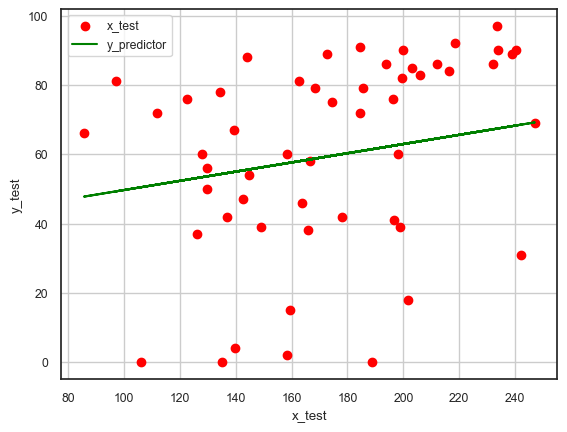

In [64]:
import matplotlib.pyplot as plt
plt.scatter(x_test3, y_test3,  color='red')
plt.plot(x_test3, y_predictor3, color='green', linewidth=1.5)

plt.legend(["x_test" , "y_predictor"])

plt.xlabel("x_test")
plt.ylabel("y_test") 
plt.grid(True)
plt.show()

In [65]:
model_regresi3.fit(x3, y3)

LinearRegression()

In [66]:
#@title multiple lienar regresion
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

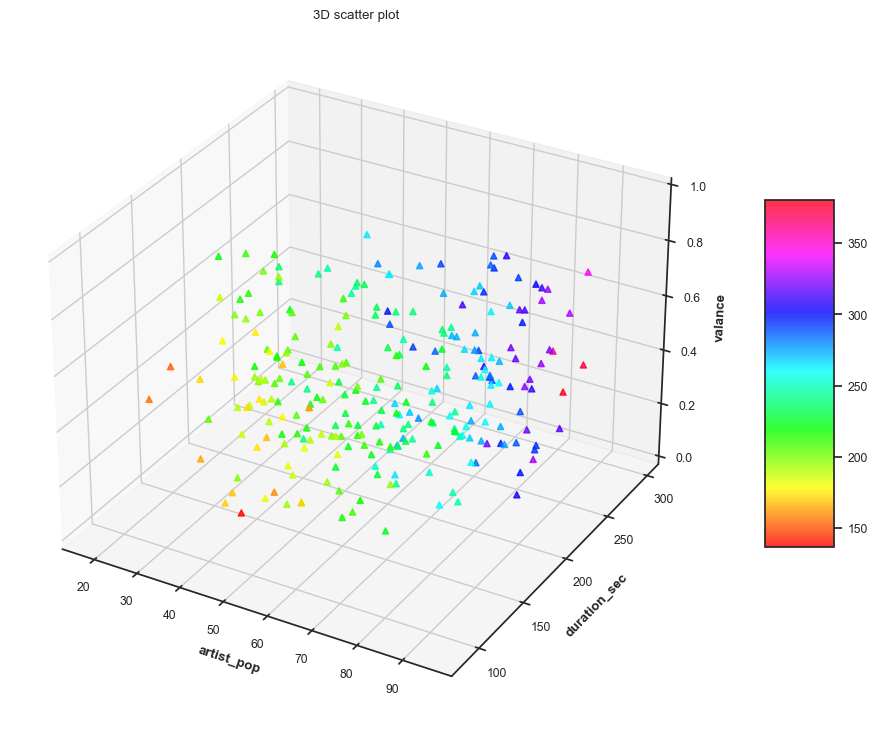

In [67]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import pustaka mplot3d
import pandas as pd

x = df['art_pop']
y = df['dur_sec']
z = df['valance']

# Buat plot 3D
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.3, 
        alpha = 0.2) 
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z), 
                    cmap = my_cmap, 
                    marker ='^')
 
plt.title("3D scatter plot")
ax.set_xlabel('artist_pop', fontweight ='bold') 
ax.set_ylabel('duration_sec', fontweight ='bold') 
ax.set_zlabel('valance', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

In [68]:
#Pilih fitur utk regresi
X = df[['art_pop', 'dur_sec', 'valance']]
y = df[['trck_pop']]

#Split dataset utk training dan test
#20% test set, 80% training set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [69]:
lm_11 = LinearRegression()
lm_11.fit(x_train, y_train) #training the algorithm

#Evaluasi dengan K-FOLDS CROSS VALIDATION
#Pilihan scoring, lihat di:
# https://scikit-learn.org/stable/modules/model_evaluation.html
#contoh: neg_mean_absolute_error, neg_mean_squared_error, neg_root_mean_squared_error, r2

folds = KFold(n_splits = 5, shuffle = True, random_state = 47)
scores = cross_val_score(lm_11, x_train, y_train, scoring='r2', cv=folds)
print(scores)
print("Avg R2: " + str(np.mean(scores)))

[0.3712348  0.0454827  0.22711659 0.05949278 0.54561095]
Avg R2: 0.2497875645404312


In [70]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predictor))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predictor))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predictor)))

Mean Absolute Error: 16.402995069936768
Mean Squared Error: 536.3636000641098
Root Mean Squared Error: 23.159525039691765


In [71]:
lm_12 = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 47)
scores = cross_val_score(lm_12, x_train, y_train, scoring='r2', cv=folds)
print(scores)
print("Avg R2: " + str(np.mean(scores)))
scores = cross_val_score(lm_12, x_train, y_train, scoring='neg_mean_absolute_error', cv=folds)
print(scores)
print("Avg MAE: " + str(np.mean(scores)))
scores = cross_val_score(lm_12, x_train, y_train, scoring='neg_mean_squared_error', cv=folds)
print(scores)
print("Avg MSE: " + str(np.mean(scores)))

[0.3712348  0.0454827  0.22711659 0.05949278 0.54561095]
Avg R2: 0.2497875645404312
[-12.9721997  -17.34956294 -16.4691566  -15.31249615  -9.34676261]
Avg MAE: -14.290035599719962
[-390.43182066 -612.64264313 -539.95852265 -536.54603718 -149.94735677]
Avg MSE: -445.9052760792312


In [72]:
import pickle

#Simpan model dgn nama: trck_pop_Regres_Model.pkl
pkl_filename = "trck_pop_Regres_Model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(lm_11, file)

In [73]:
#Saatnya menggunakan model untuk memprediksi data baru
#Load/baca model yg sudah disimpan
import pickle
pkl_filename = "trck_pop_Regres_Model.pkl"
with open(pkl_filename, 'rb') as file:
    loaded_model_regres = pickle.load(file)

In [105]:
#Load data baru yg akan diprediksi nilai mpg-nya
#urutan atribut prediktornya harus sama seperti saat pembuatan model

df_model = pd.read_csv('Model1.csv')
x_model = df_model[['art_pop', 'dur_sec', 'valance']].values
x_model

array([[7.100e+01, 1.480e+02, 6.320e-01],
       [6.400e+01, 1.720e+02, 2.415e-01],
       [7.700e+01, 1.350e+02, 7.141e-01],
       [2.700e+01, 1.270e+02, 4.120e-01],
       [6.900e+01, 1.620e+02, 3.542e-01],
       [5.800e+01, 1.820e+02, 1.783e-01],
       [4.900e+01, 1.500e+02, 7.210e-01],
       [7.000e+01, 1.580e+02, 5.792e-01],
       [8.100e+01, 2.380e+02, 8.523e-01],
       [7.400e+01, 2.470e+02, 1.274e-01]])

In [75]:
y_predictor_new = loaded_model_regres.predict(x_model)
y_predictor_new

c:\Users\Dany Syauqi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[   55.17209941],
       [   36.18127573],
       [   61.18266463],
       [   20.72247851],
       [   43.45430272],
       [   50.47042059],
       [   39.62363085],
       [   52.40687525],
       [-3453.8162208 ],
       [   40.44344188]])

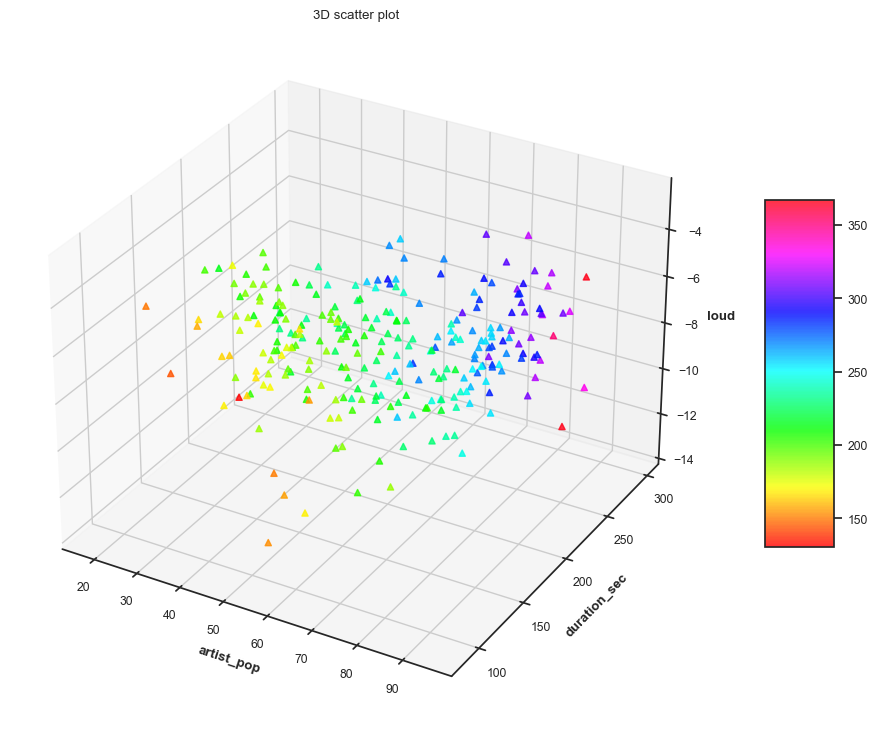

In [76]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import pustaka mplot3d
import pandas as pd

x = df['art_pop']
y = df['dur_sec']
z = df['loud']

# Buat plot 3D
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.3, 
        alpha = 0.2) 
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z), 
                    cmap = my_cmap, 
                    marker ='^')
 
plt.title("3D scatter plot")
ax.set_xlabel('artist_pop', fontweight ='bold') 
ax.set_ylabel('duration_sec', fontweight ='bold') 
ax.set_zlabel('loud', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

In [77]:
X = df[['art_pop', 'dur_sec', 'loud']]
y = df[['trck_pop']]

#Split dataset utk training dan test
#20% test set, 80% training set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [78]:
lm_21 = LinearRegression()
lm_21.fit(x_train, y_train) #training the algorithm

#Evaluasi dengan K-FOLDS CROSS VALIDATION
#Pilihan scoring, lihat di:
# https://scikit-learn.org/stable/modules/model_evaluation.html
#contoh: neg_mean_absolute_error, neg_mean_squared_error, neg_root_mean_squared_error, r2

folds = KFold(n_splits = 5, shuffle = True, random_state = 47)
scores = cross_val_score(lm_21, x_train, y_train, scoring='r2', cv=folds)
print(scores)
print("Avg R2: " + str(np.mean(scores)))

[0.37227871 0.06735715 0.19572104 0.08700341 0.55772679]
Avg R2: 0.2560174187626326


In [79]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predictor))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predictor))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predictor)))

Mean Absolute Error: 16.402995069936768
Mean Squared Error: 536.3636000641098
Root Mean Squared Error: 23.159525039691765


In [80]:
lm_22 = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 47)
scores = cross_val_score(lm_22, x_train, y_train, scoring='r2', cv=folds)
print(scores)
print("Avg R2: " + str(np.mean(scores)))
scores = cross_val_score(lm_22, x_train, y_train, scoring='neg_mean_absolute_error', cv=folds)
print(scores)
print("Avg MAE: " + str(np.mean(scores)))
scores = cross_val_score(lm_22, x_train, y_train, scoring='neg_mean_squared_error', cv=folds)
print(scores)
print("Avg MSE: " + str(np.mean(scores)))

[0.37227871 0.06735715 0.19572104 0.08700341 0.55772679]
Avg R2: 0.2560174187626326
[-13.09167156 -16.91383286 -16.76923343 -15.01767006  -9.21292967]
Avg MAE: -14.20106751705824
[-389.78360648 -598.60285554 -561.89235063 -520.85161721 -145.94915777]
Avg MSE: -443.4159175266568


In [81]:
import pickle

#Simpan model dgn nama: Mpg_Regres_Model.pkl
pkl_filename = "trck_pop_Regres_Model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(lm_21, file)

In [82]:
#Load/baca model yg sudah disimpan
import pickle
pkl_filename = "trck_pop_Regres_Model.pkl"
with open(pkl_filename, 'rb') as file:
    loaded_model_regres = pickle.load(file)

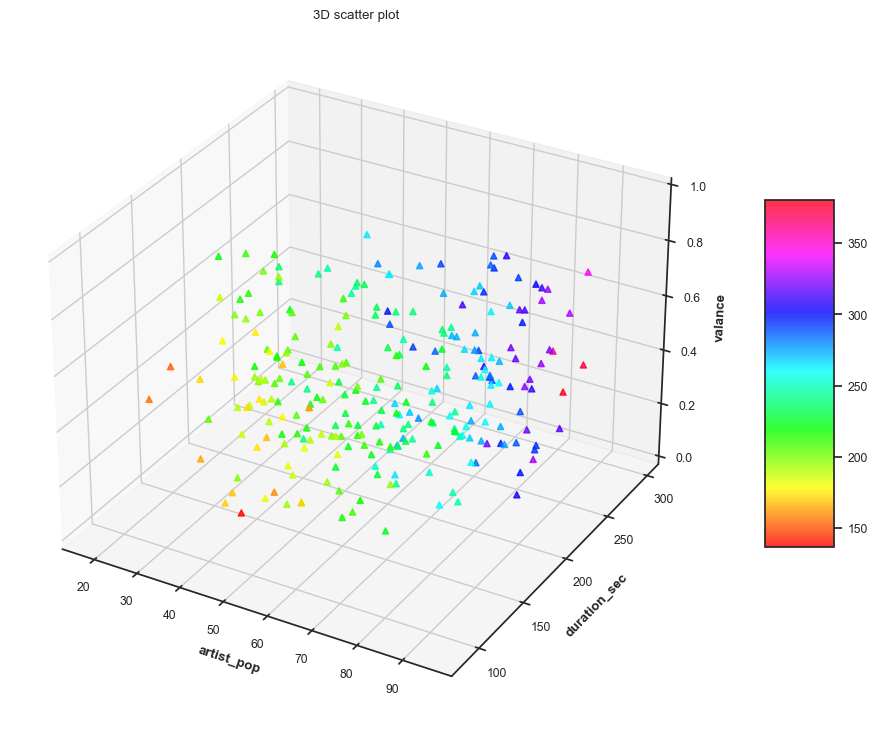

In [107]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import pustaka mplot3d
import pandas as pd

x = df['art_pop']
y = df['dur_sec']
z = df['valance']

# Buat plot 3D
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.3, 
        alpha = 0.2) 
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z), 
                    cmap = my_cmap, 
                    marker ='^')
 
plt.title("3D scatter plot")
ax.set_xlabel('artist_pop', fontweight ='bold') 
ax.set_ylabel('duration_sec', fontweight ='bold') 
ax.set_zlabel('valance', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

In [123]:
df_new = pd.read_csv('Model1.csv')
x_new = df_new[['art_pop','dur_sec', 'valance']].values
x_new

array([[7.100e+01, 1.480e+02, 6.320e-01],
       [6.400e+01, 1.720e+02, 2.415e-01],
       [7.700e+01, 1.350e+02, 7.141e-01],
       [2.700e+01, 1.270e+02, 4.120e-01],
       [6.900e+01, 1.620e+02, 3.542e-01],
       [5.800e+01, 1.820e+02, 1.783e-01],
       [4.900e+01, 1.500e+02, 7.210e-01],
       [7.000e+01, 1.580e+02, 5.792e-01],
       [8.100e+01, 2.380e+02, 8.523e-01],
       [7.400e+01, 2.470e+02, 1.274e-01]])

In [ ]:
y_predict_new = loaded_model_regres.predict(x_new)
print(y_predict_new)

In [98]:
X = df[['art_pop', 'dur_sec', 't_signature']]
y = df[['trck_pop']]

#Split dataset utk training dan test
#20% test set, 80% training set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [99]:
lm_31 = LinearRegression()
lm_31.fit(x_train, y_train) #training the algorithm

#Evaluasi dengan K-FOLDS CROSS VALIDATION
#Pilihan scoring, lihat di:
# https://scikit-learn.org/stable/modules/model_evaluation.html
#contoh: neg_mean_absolute_error, neg_mean_squared_error, neg_root_mean_squared_error, r2

folds = KFold(n_splits = 5, shuffle = True, random_state = 47)
scores = cross_val_score(lm_31, x_train, y_train, scoring='r2', cv=folds)
print(scores)
print("Avg R2: " + str(np.mean(scores)))

[0.38429118 0.05761682 0.2348131  0.13985085 0.56726239]
Avg R2: 0.2767668681592467


In [100]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predictor))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predictor))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predictor)))

Mean Absolute Error: 16.402995069936768
Mean Squared Error: 536.3636000641098
Root Mean Squared Error: 23.159525039691765


In [101]:
lm_32 = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 47)
scores = cross_val_score(lm_32, x_train, y_train, scoring='r2', cv=folds)
print(scores)
print("Avg R2: " + str(np.mean(scores)))
scores = cross_val_score(lm_32, x_train, y_train, scoring='neg_mean_absolute_error', cv=folds)
print(scores)
print("Avg MAE: " + str(np.mean(scores)))
scores = cross_val_score(lm_32, x_train, y_train, scoring='neg_mean_squared_error', cv=folds)
print(scores)
print("Avg MSE: " + str(np.mean(scores)))

[0.38429118 0.05761682 0.2348131  0.13985085 0.56726239]
Avg R2: 0.2767668681592467
[-12.65910859 -16.79218398 -16.03410497 -14.87289757  -9.08142618]
Avg MAE: -13.887944257416342
[-382.32446263 -604.85454304 -534.5815177  -490.70289773 -142.80242896]
Avg MSE: -431.0531700146351


In [102]:
import pickle

#Simpan model dgn nama: trck_pop_Regres_Model.pkl
pkl_filename = "trck_pop_Regres_Model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(lm_31, file)

In [103]:
#Saatnya menggunakan model untuk memprediksi data baru
#Load/baca model yg sudah disimpan
import pickle
pkl_filename = "trck_pop_Regres_Model.pkl"
with open(pkl_filename, 'rb') as file:
    loaded_model_regres = pickle.load(file)

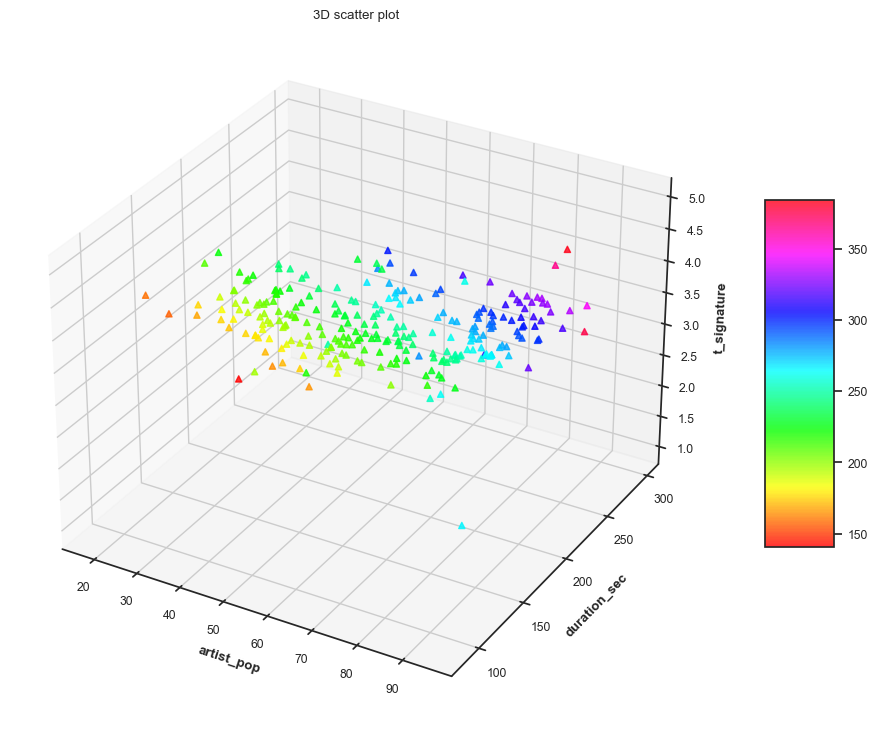

In [126]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import pustaka mplot3d
import pandas as pd

x = df['art_pop']
y = df['dur_sec']
z = df['t_signature']

# Buat plot 3D
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.3, 
        alpha = 0.2) 
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z), 
                    cmap = my_cmap, 
                    marker ='^')
 
plt.title("3D scatter plot")
ax.set_xlabel('artist_pop', fontweight ='bold') 
ax.set_ylabel('duration_sec', fontweight ='bold') 
ax.set_zlabel('t_signature', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

In [104]:
#Load data baru yg akan diprediksi nilai mpg-nya
#urutan atribut prediktornya harus sama seperti saat pembuatan model

df_model = pd.read_csv('Model1.csv')
x_model = df_model[['art_pop', 'dur_sec', 't_signature']].values
x_model

array([[ 71, 148,   4],
       [ 64, 172,   4],
       [ 77, 135,   4],
       [ 27, 127,   4],
       [ 69, 162,   5],
       [ 58, 182,   4],
       [ 49, 150,   5],
       [ 70, 158,   4],
       [ 81, 238,   5],
       [ 74, 247,   4]], dtype=int64)

In [106]:
y_predictor_new = loaded_model_regres.predict(x_model)
y_predictor_new

c:\Users\Dany Syauqi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[26.42965966],
       [17.54268725],
       [31.35831196],
       [-7.82290903],
       [22.16605709],
       [12.76471875],
       [11.8045099 ],
       [25.33004872],
       [37.90084183],
       [24.93552916]])

Dua kombinasi

In [108]:
X = df[['art_pop', 'dur_sec']]
y = df[['trck_pop']]

#Split dataset utk training dan test
#20% test set, 80% training set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [109]:
lm_41 = LinearRegression()
lm_41.fit(x_train, y_train) #training the algorithm

#Evaluasi dengan K-FOLDS CROSS VALIDATION
#Pilihan scoring, lihat di:
# https://scikit-learn.org/stable/modules/model_evaluation.html
#contoh: neg_mean_absolute_error, neg_mean_squared_error, neg_root_mean_squared_error, r2

folds = KFold(n_splits = 5, shuffle = True, random_state = 47)
scores = cross_val_score(lm_41, x_train, y_train, scoring='r2', cv=folds)
print(scores)
print("Avg R2: " + str(np.mean(scores)))

[0.38068912 0.07759298 0.22751713 0.08625077 0.55568644]
Avg R2: 0.26554728541080175


In [110]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predictor))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predictor))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predictor)))

Mean Absolute Error: 16.402995069936768
Mean Squared Error: 536.3636000641098
Root Mean Squared Error: 23.159525039691765


In [111]:
lm_42 = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 47)
scores = cross_val_score(lm_42, x_train, y_train, scoring='r2', cv=folds)
print(scores)
print("Avg R2: " + str(np.mean(scores)))
scores = cross_val_score(lm_42, x_train, y_train, scoring='neg_mean_absolute_error', cv=folds)
print(scores)
print("Avg MAE: " + str(np.mean(scores)))
scores = cross_val_score(lm_42, x_train, y_train, scoring='neg_mean_squared_error', cv=folds)
print(scores)
print("Avg MSE: " + str(np.mean(scores)))

[0.38068912 0.07759298 0.22751713 0.08625077 0.55568644]
Avg R2: 0.26554728541080175
[-12.92369847 -16.74678529 -16.4665273  -15.02903365  -9.22061972]
Avg MAE: -14.077332885142585
[-384.5611633  -592.03313988 -539.67869473 -521.28098685 -146.62246886]
Avg MSE: -436.83529072507906


In [112]:
import pickle

#Simpan model dgn nama: Mpg_Regres_Model.pkl
pkl_filename = "trck_pop_Regres_Model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(lm_41, file)

In [113]:
#Load/baca model yg sudah disimpan
import pickle
pkl_filename = "trck_pop_Regres_Model.pkl"
with open(pkl_filename, 'rb') as file:
    loaded_model_regres = pickle.load(file)

In [ ]:
X = df[['art_pop', 'dur_sec']]
y = df[['trck_pop']]

#Split dataset utk training dan test
#20% test set, 80% training set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [114]:
X = df[['art_pop', 'valance']]
y = df[['trck_pop']]

#Split dataset utk training dan test
#20% test set, 80% training set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [115]:
lm_51 = LinearRegression()
lm_51.fit(x_train, y_train) #training the algorithm

#Evaluasi dengan K-FOLDS CROSS VALIDATION
#Pilihan scoring, lihat di:
# https://scikit-learn.org/stable/modules/model_evaluation.html
#contoh: neg_mean_absolute_error, neg_mean_squared_error, neg_root_mean_squared_error, r2

folds = KFold(n_splits = 5, shuffle = True, random_state = 47)
scores = cross_val_score(lm_51, x_train, y_train, scoring='r2', cv=folds)
print(scores)
print("Avg R2: " + str(np.mean(scores)))

[0.37937976 0.07442865 0.22683351 0.0682052  0.5480041 ]
Avg R2: 0.2593702427201638


In [116]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predictor))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predictor))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predictor)))

Mean Absolute Error: 16.402995069936768
Mean Squared Error: 536.3636000641098
Root Mean Squared Error: 23.159525039691765


In [117]:
lm_52 = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 47)
scores = cross_val_score(lm_52, x_train, y_train, scoring='r2', cv=folds)
print(scores)
print("Avg R2: " + str(np.mean(scores)))
scores = cross_val_score(lm_52, x_train, y_train, scoring='neg_mean_absolute_error', cv=folds)
print(scores)
print("Avg MAE: " + str(np.mean(scores)))
scores = cross_val_score(lm_52, x_train, y_train, scoring='neg_mean_squared_error', cv=folds)
print(scores)
print("Avg MSE: " + str(np.mean(scores)))

[0.37937976 0.07442865 0.22683351 0.0682052  0.5480041 ]
Avg R2: 0.2593702427201638
[-12.8248439  -16.7599493  -16.48222791 -15.23902883  -9.36125796]
Avg MAE: -14.133461581233888
[-385.37420834 -594.06411708 -540.15629119 -531.57573046 -149.15762206]
Avg MSE: -440.0655938262353


In [118]:
import pickle

#Simpan model dgn nama: Mpg_Regres_Model.pkl
pkl_filename = "trck_pop_Regres_Model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(lm_51, file)

In [119]:
#Load/baca model yg sudah disimpan
import pickle
pkl_filename = "trck_pop_Regres_Model.pkl"
with open(pkl_filename, 'rb') as file:
    loaded_model_regres = pickle.load(file)

In [85]:
X = df[["art_pop","trck_pop","dance","energy","loud","key","speech","acoustic","instrument","live","valance","tempo","t_signature","dur_sec"]]
y = df[['trck_pop']]

#Split dataset utk training dan test
#20% test set, 80% training set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [86]:
lm_91 = LinearRegression()
lm_91.fit(x_train, y_train) #training the algorithm

#Evaluasi dengan K-FOLDS CROSS VALIDATION
#Pilihan scoring, lihat di:
# https://scikit-learn.org/stable/modules/model_evaluation.html
#contoh: neg_mean_absolute_error, neg_mean_squared_error, neg_root_mean_squared_error, r2

folds = KFold(n_splits = 5, shuffle = True, random_state = 47)
scores = cross_val_score(lm_91, x_train, y_train, scoring='r2', cv=folds)
print(scores)
print("Avg R2: " + str(np.mean(scores)))

[1. 1. 1. 1. 1.]
Avg R2: 1.0


In [87]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predictor))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predictor))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predictor)))

Mean Absolute Error: 16.402995069936768
Mean Squared Error: 536.3636000641098
Root Mean Squared Error: 23.159525039691765


In [88]:
lm_92 = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 47)
scores = cross_val_score(lm_92, x_train, y_train, scoring='r2', cv=folds)
print(scores)
print("Avg R2: " + str(np.mean(scores)))
scores = cross_val_score(lm_92, x_train, y_train, scoring='neg_mean_absolute_error', cv=folds)
print(scores)
print("Avg MAE: " + str(np.mean(scores)))
scores = cross_val_score(lm_92, x_train, y_train, scoring='neg_mean_squared_error', cv=folds)
print(scores)
print("Avg MSE: " + str(np.mean(scores)))

[1. 1. 1. 1. 1.]
Avg R2: 1.0
[-1.92241479e-14 -1.55552621e-14 -1.86765425e-14 -3.87532707e-14
 -3.17052424e-14]
Avg MAE: -2.4782893124509406e-14
[-6.69801706e-28 -4.65005589e-28 -5.85742195e-28 -2.50968890e-27
 -1.93630366e-27]
Avg MSE: -1.233308409259417e-27


In [89]:
import pickle

#Simpan model dgn nama: Mpg_Regres_Model.pkl
pkl_filename = "model_final.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(lm_91, file)

In [90]:
import pickle
pkl_filename = "model_final.pkl"
with open(pkl_filename, 'rb') as file:
    loaded_model_regres = pickle.load(file)

In [91]:
df_new = pd.read_csv('Model1.csv')
x_new = df_new[["art_pop","trck_pop","dance","energy","loud","key","speech","acoustic","instrument","live","valance","tempo","t_signature","dur_sec"]].values
x_new

array([[ 7.10000e+01,  8.50000e+01,  7.43000e-01,  7.85000e-01,
        -4.63100e+00,  4.00000e+00,  4.23000e-02,  1.21000e-03,
         1.24252e+02,  3.32100e-01,  6.32000e-01,  1.51531e+02,
         4.00000e+00,  1.48000e+02],
       [ 6.40000e+01,  9.20000e+01,  2.41000e-01,  8.50000e-02,
        -1.25130e+01,  4.00000e+00,  1.51300e-01,  7.45100e-02,
         5.15130e+01,  1.51200e-01,  2.41500e-01,  6.91230e+01,
         4.00000e+00,  1.72000e+02],
       [ 7.70000e+01,  3.80000e+01,  8.51000e-01,  9.12000e-01,
        -3.61200e+00,  6.00000e+00,  2.85000e-02,  1.51300e-03,
         1.45263e+02,  6.12100e-01,  7.14100e-01,  1.73013e+02,
         4.00000e+00,  1.35000e+02],
       [ 2.70000e+01,  2.50000e+01,  6.12000e-01,  5.81000e-01,
        -6.14200e+00,  4.00000e+00,  6.41000e-02,  1.53200e-02,
         9.41520e+01,  4.51300e-01,  4.12000e-01,  1.24513e+02,
         4.00000e+00,  1.27000e+02],
       [ 6.90000e+01,  5.00000e+01,  3.51000e-01,  1.41000e-01,
        -1.04120e+01

In [92]:
y_pred_new = loaded_model_regres.predict(x_new)
print(y_pred_new)

[[85.]
 [92.]
 [38.]
 [25.]
 [50.]
 [67.]
 [72.]
 [39.]
 [29.]
 [48.]]


c:\Users\Dany Syauqi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
